<a href="https://colab.research.google.com/github/Mayankkestwal10/fast-ai/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from fastai.basics import *
import torch

<p>In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an optimization method commonly used in neural networks. We will illustrate the concepts with concrete examples.</p>

In [0]:
n = 100

In [0]:
x = torch.ones(n,2)

In [30]:
x[:,0].uniform_(-1.,1)

tensor([ 0.8713,  0.6366, -0.6100,  0.9930, -0.0563,  0.0503,  0.5696,  0.5984,
         0.5348,  0.9693, -0.4012, -0.5305, -0.0598,  0.6876,  0.8987,  0.8787,
        -0.0086, -0.4793,  0.4147,  0.2250,  0.2678, -0.8101,  0.2855,  0.8767,
        -0.8305, -0.6885, -0.6223, -0.8149,  0.9119,  0.5168,  0.8857,  0.5363,
         0.9796, -0.8452, -0.3131, -0.5686,  0.2709,  0.5596,  0.1866,  0.3587,
         0.3214, -0.0448, -0.0470,  0.8190, -0.4644, -0.8226,  0.1654, -0.9933,
        -0.5295,  0.0724, -0.9735,  0.3277,  0.3559, -0.9547, -0.7896, -0.4934,
        -0.9415, -0.9738, -0.1478, -0.2923, -0.5692, -0.6268,  0.4458, -0.9651,
         0.4491,  0.6745, -0.2271,  0.6167, -0.3542, -0.8616,  0.9496, -0.7739,
        -0.3718, -0.4322,  0.9258,  0.9845, -0.8539,  0.7127,  0.6633, -0.5491,
         0.3334, -0.9344,  0.7084,  0.1549,  0.4270,  0.9238,  0.7237, -0.6457,
         0.7997,  0.9716, -0.9779,  0.7929,  0.5607, -0.9683,  0.6593, -0.6809,
         0.6051, -0.7330, -0.6285,  0.13

In [31]:
x[5]

tensor([0.0503, 1.0000])

In [32]:
a = torch.tensor([3.,2])
a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

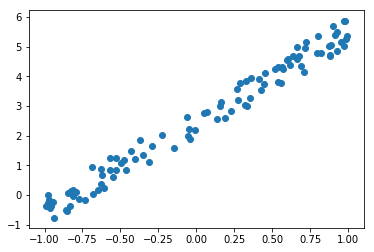

In [34]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat, y):
  return ((y_hat-y)**2).mean()

In [47]:
a = torch.tensor([-1.,1])
a

tensor([-1.,  1.])

In [38]:
y_hat = x@a
mse(y_hat,y)

tensor(9.7188)

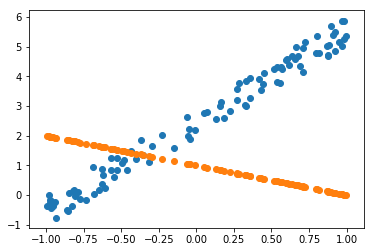

In [39]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

<h2>Gradient Descent</h2>
<p>Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.</p>

In [0]:
a = nn.Parameter(a)

In [49]:
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat,y)
  if t%10 == 0 :
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [51]:
lr = 1e-1
for t in range(100): update()

tensor(9.7188, grad_fn=<MseLossBackward>)
tensor(1.2285, grad_fn=<MseLossBackward>)
tensor(0.2714, grad_fn=<MseLossBackward>)
tensor(0.1197, grad_fn=<MseLossBackward>)
tensor(0.0949, grad_fn=<MseLossBackward>)
tensor(0.0909, grad_fn=<MseLossBackward>)
tensor(0.0902, grad_fn=<MseLossBackward>)
tensor(0.0901, grad_fn=<MseLossBackward>)
tensor(0.0901, grad_fn=<MseLossBackward>)
tensor(0.0901, grad_fn=<MseLossBackward>)


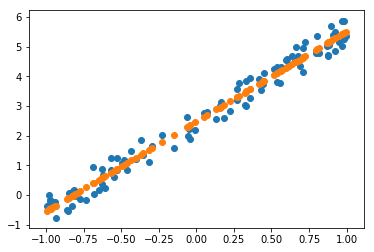

In [54]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [57]:
a = nn.Parameter(torch.tensor([-1.,1]))

fig = plt.figure()
plt.scatter(x[:,0],y,c='orange')
line, = plt.plot(x[:,0],x@a)
plt.close()


def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0,100),interval=20)

<h3>Vocab</h3>
<ul>
  <li>Learning rate</li>
  <li>Epoch</li>
  <li>Minibatch</li>
  <li>SGD</li>
  <li>Model/Architecture</li>
  <li>Parameters</li>
  <li>Loss Functions</li>
</ul>